In [1]:
import os 

os.getcwd() 

'/kaggle/working'

In [2]:
print(os.listdir("/kaggle/input/counter-strike-2-body-and-head-classification"))

['custom_data.yaml', 'val', 'train']


<br><br>

## Install Necessary Libraries

In [3]:
!pip  install wget
!pip install ultralytics

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=712eaee0640d250d1fe698b1a13ddafd016330869ee4bc47ce823d4367c02f6f
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.8 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.7 MB/s

<br>

## Download Pretrained YOLOv8 model (yolov8n.pt)

In [4]:
import wget

# URL of the YOLOv4 model file
model_url = "https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n.pt"

# Path where you want to save the model file
save_path = "/kaggle/working"

# Download the model file
wget.download(model_url, save_path)

print("Model downloaded successfully.")

Model downloaded successfully.


In [5]:
# display necessary files 
print(os.listdir("/kaggle/input/counter-strike-2-body-and-head-classification"))
print(os.listdir("/kaggle/working"))

['custom_data.yaml', 'val', 'train']
['yolov8n.pt', '.virtual_documents']


<br>

## Create a YAML File 

In [6]:
import yaml

# Create configuration
config = {
   "path": "/kaggle/input/counter-strike-2-body-and-head-classification",
   "train": "train",
   "val": "val",
   "nc": 5,
   "names": [ "none", "ct_body", "ct_head","t_body","t_head"]  

}
with open("/kaggle/working/csgo-data.yaml", "w") as file:
   yaml.dump(config, file, default_flow_style=False)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<br>

## Check GPU

In [7]:
from ultralytics import YOLO
import torch

# check GPU
print(torch.cuda.get_device_name(0))

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Tesla P100-PCIE-16GB


<br>

## Load pretrained YOLO model

In [8]:
model = YOLO('/kaggle/working/yolov8n.pt') 

<br>

## Train

In [9]:
###### Training.
results = model.train(
   data='/kaggle/working/csgo-data.yaml',  # .yaml file
   imgsz=640, # image size
   epochs=25,  # epoch number
   batch=8, 
   name='csgo_model1_25_epoch', # output folder name, it contains model weights and all of the other things.
    plots=True, # Plots about metrics (precision, recall,f1 score)
    save=True,
)

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/csgo-data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/working/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=csgo_model1_25_epoch, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 62.2±15.5 MB/s, size: 2933.7 KB)


train: Scanning /kaggle/input/counter-strike-2-body-and-head-classification/train/labels... 337 images, 0 backgrounds, 0 corrupt: 100%|██████████| 337/337 [00:03<00:00, 85.08it/s] 


WARNING ⚠️ train: Cache directory /kaggle/input/counter-strike-2-body-and-head-classification/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 148.8±18.3 MB/s, size: 3466.7 KB)


val: Scanning /kaggle/input/counter-strike-2-body-and-head-classification/val/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:01<00:00, 75.20it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/counter-strike-2-body-and-head-classification/val is not writeable, cache not saved.


Plotting labels to runs/detect/csgo_model1_25_epoch/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/csgo_model1_25_epoch
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      1.17G      1.411      4.441     0.9728          3        640: 100%|██████████| 43/43 [00:11<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]


                   all         90        215    0.00165       0.16     0.0665       0.04

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      1.26G      1.346      2.998     0.9598          2        640: 100%|██████████| 43/43 [00:10<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.48it/s]


                   all         90        215    0.00508      0.522      0.248      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      1.28G      1.284      2.655     0.9688          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]

                   all         90        215      0.581      0.295      0.349      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      1.29G      1.209       2.36     0.9238          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all         90        215      0.478      0.456      0.382      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      1.31G      1.293      2.332     0.9595          4        640: 100%|██████████| 43/43 [00:11<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]

                   all         90        215      0.528      0.563      0.448       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      1.33G      1.243      2.087     0.9368          4        640: 100%|██████████| 43/43 [00:11<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.46it/s]

                   all         90        215       0.55      0.597      0.515      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      1.34G       1.17      1.914     0.9332          2        640: 100%|██████████| 43/43 [00:10<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]


                   all         90        215      0.729      0.508      0.594      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      1.36G      1.212      1.877     0.9283          1        640: 100%|██████████| 43/43 [00:10<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.65it/s]


                   all         90        215      0.773      0.579      0.619      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      1.37G      1.118      1.533     0.9215          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.18it/s]


                   all         90        215      0.774      0.578      0.634      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       1.4G       1.12      1.482     0.8952         10        640: 100%|██████████| 43/43 [00:10<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.16it/s]


                   all         90        215       0.83      0.605      0.647       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      1.41G      1.087      1.444     0.8984          2        640: 100%|██████████| 43/43 [00:10<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.83it/s]

                   all         90        215      0.829       0.62      0.658      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      1.43G      1.075      1.366     0.8983          2        640: 100%|██████████| 43/43 [00:10<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.68it/s]


                   all         90        215      0.852      0.622      0.684      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      1.45G      1.099      1.373     0.8899          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.80it/s]

                   all         90        215       0.79      0.626      0.665       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      1.46G      1.047      1.255     0.8814          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.19it/s]

                   all         90        215      0.897       0.61      0.676      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      1.48G      1.035      1.305     0.8854          4        640: 100%|██████████| 43/43 [00:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.27it/s]

                   all         90        215      0.849      0.643      0.701      0.466


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       1.5G      0.973      1.421     0.8671          2        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.49it/s]

                   all         90        215      0.815      0.648      0.683      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      1.51G     0.9924      1.371     0.8718          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]

                   all         90        215      0.849      0.602      0.678      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      1.53G     0.9712      1.262     0.8722          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.56it/s]

                   all         90        215      0.833       0.63      0.676      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      1.55G     0.9628       1.26     0.8751          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.24it/s]

                   all         90        215      0.794       0.65      0.669       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      1.57G     0.9468       1.22     0.8608          2        640: 100%|██████████| 43/43 [00:10<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.38it/s]

                   all         90        215      0.854      0.634      0.686       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      1.58G     0.9416      1.266     0.8383          1        640: 100%|██████████| 43/43 [00:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.53it/s]

                   all         90        215      0.832      0.645      0.692      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       1.6G       0.91      1.151     0.8574          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.95it/s]

                   all         90        215      0.867      0.658      0.701      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      1.62G     0.8688      1.095     0.8466          5        640: 100%|██████████| 43/43 [00:11<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.04it/s]

                   all         90        215      0.883      0.645        0.7      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      1.63G     0.8882      1.064     0.8599          2        640: 100%|██████████| 43/43 [00:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all         90        215      0.888      0.656      0.705      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      1.64G     0.8799      1.122     0.8414          1        640: 100%|██████████| 43/43 [00:10<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]

                   all         90        215      0.891      0.651      0.703      0.484



25 epochs completed in 0.090 hours.
Optimizer stripped from runs/detect/csgo_model1_25_epoch/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/csgo_model1_25_epoch/weights/best.pt, 6.2MB

Validating runs/detect/csgo_model1_25_epoch/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        215      0.867      0.658      0.701      0.493
               ct_body         41         45       0.79      0.867      0.897       0.71
               ct_head         43         47      0.796      0.447      0.491        0.3
                t_body         54         60      0.882      0.873      0.903      0.679
                t_head         56         63          1      0.445      0.515      0.284
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/csgo_model1_25_epoch


<br><br>

## Training Result

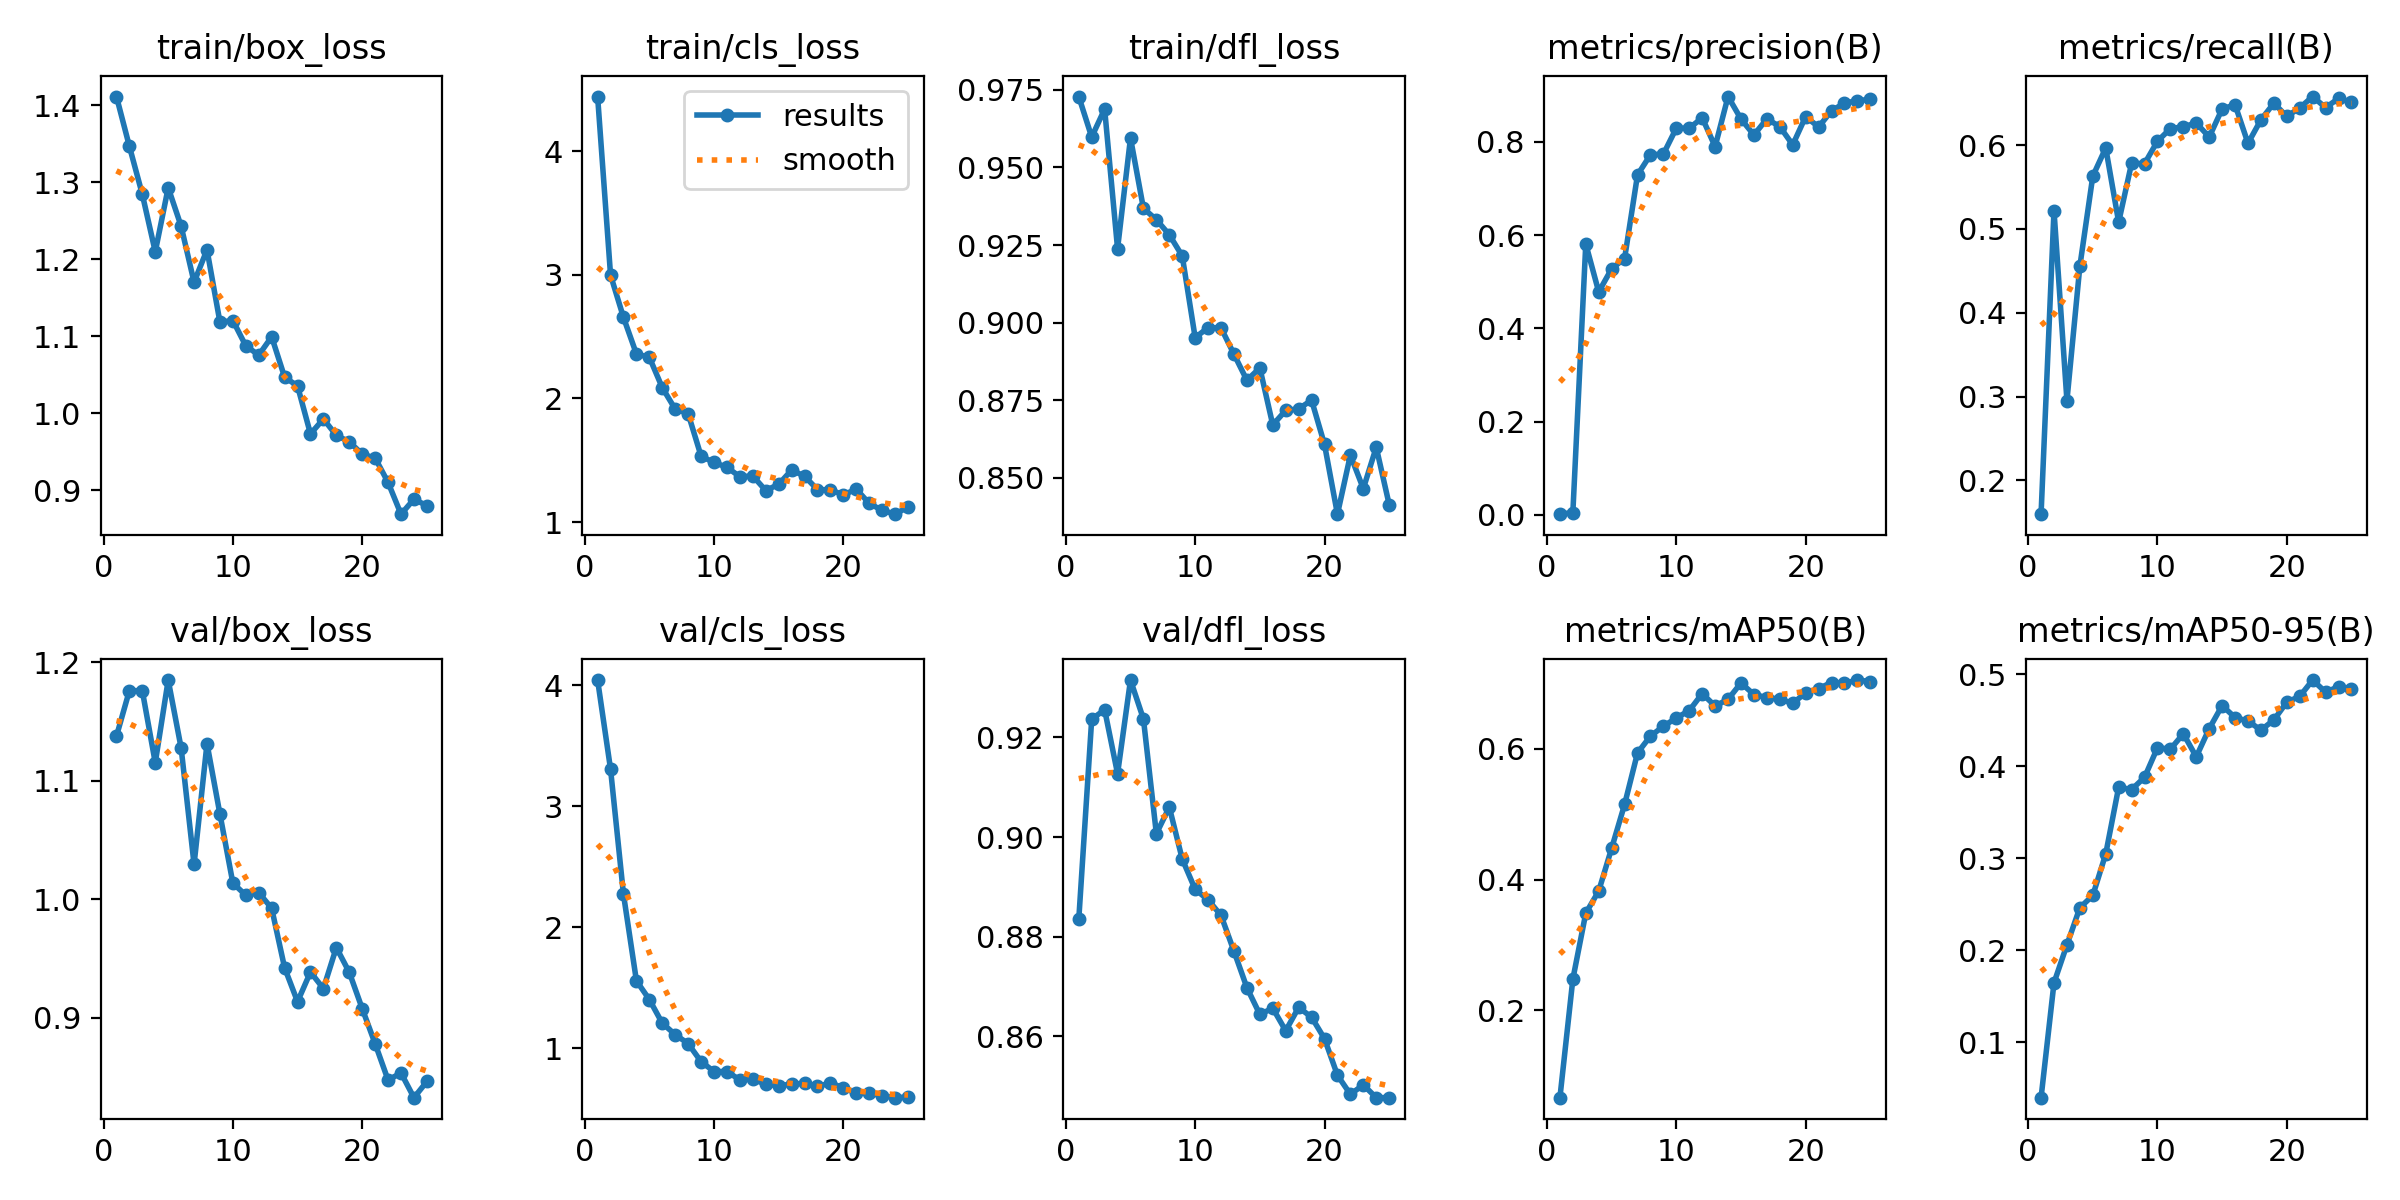

In [10]:
from IPython.display import Image
Image(filename=f'/kaggle/working/runs/detect/csgo_model1_25_epoch/results.png', width=900)

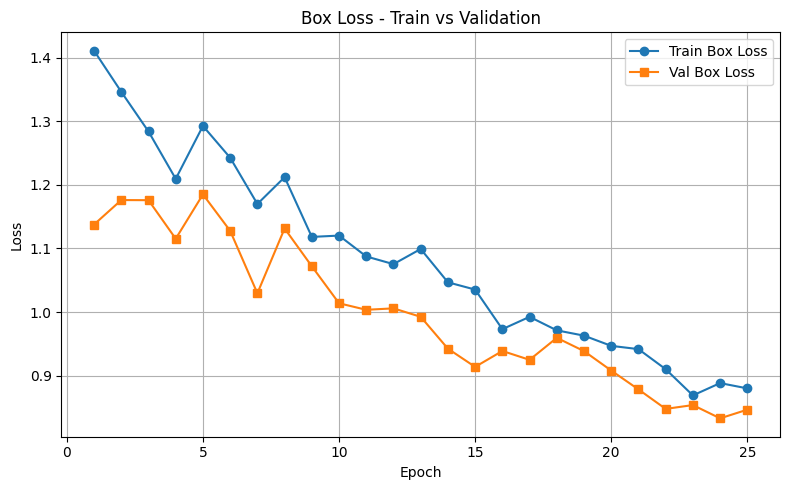

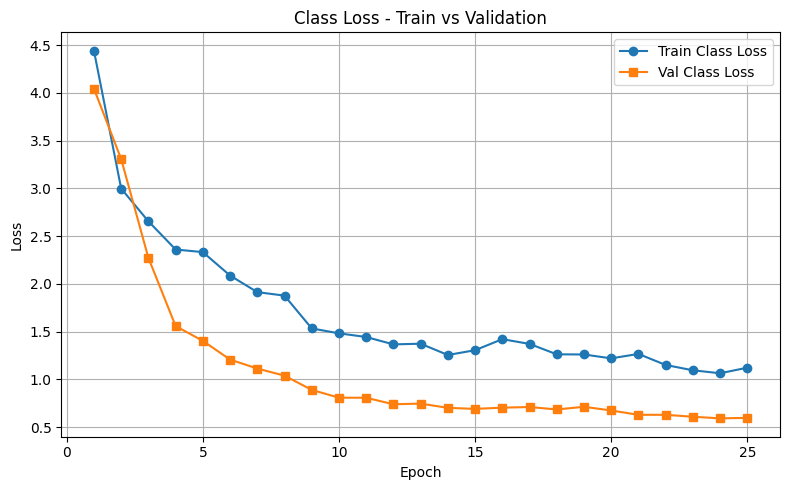

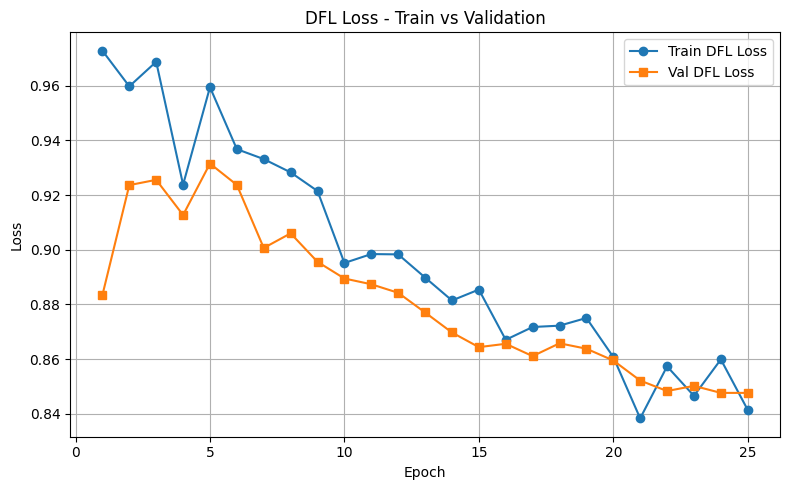

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
csv_path = '/kaggle/working/runs/detect/csgo_model1_25_epoch/results.csv'  # 🔁 Replace with actual path
df = pd.read_csv(csv_path)

# Loss pairs: (train_col, val_col, title)
losses = [
    ('train/box_loss', 'val/box_loss', 'Box Loss'),
    ('train/cls_loss', 'val/cls_loss', 'Class Loss'),
    ('train/dfl_loss', 'val/dfl_loss', 'DFL Loss'),
]

# Plot each loss type in a separate figure
for train_col, val_col, title in losses:
    plt.figure(figsize=(8, 5))
    plt.plot(df['epoch'], df[train_col], label=f'Train {title}', marker='o')
    plt.plot(df['epoch'], df[val_col], label=f'Val {title}', marker='s')
    
    plt.title(f'{title} - Train vs Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


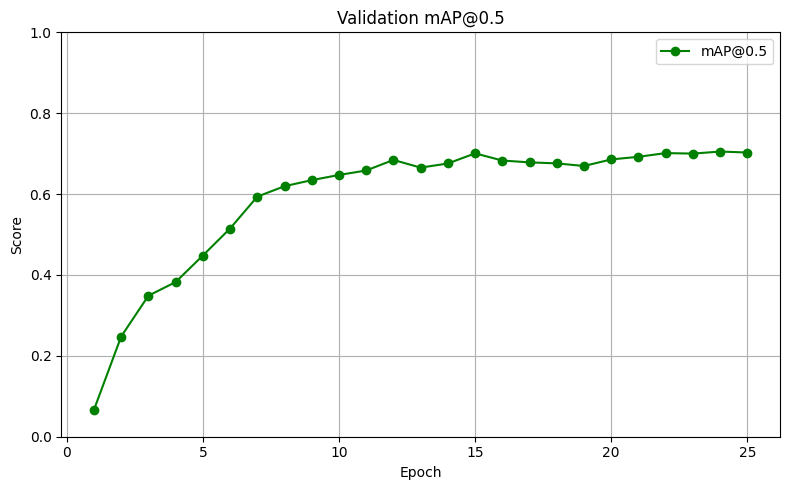

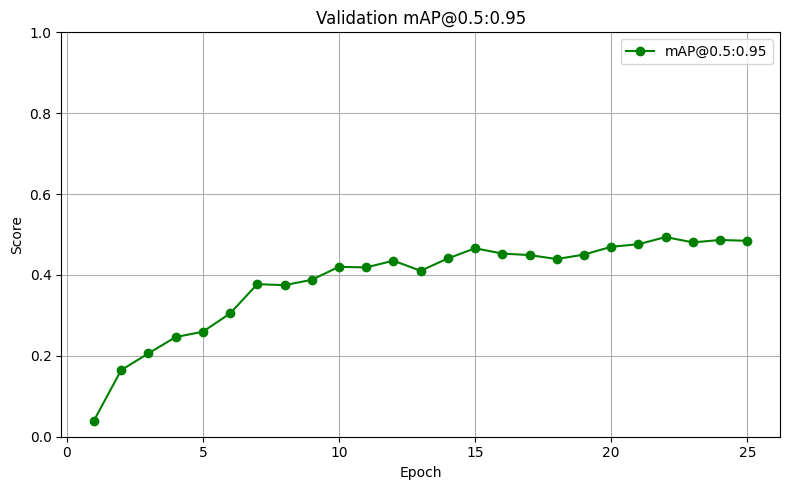

In [12]:
# List of mAP metrics to plot
map_metrics = [
    ('metrics/mAP50(B)', 'mAP@0.5'),
    ('metrics/mAP50-95(B)', 'mAP@0.5:0.95'),
]

# Plot each mAP metric
for col, title in map_metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(df['epoch'], df[col], label=title, marker='o', color='green')

    plt.title(f'Validation {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

<br>

## Zip training folder and download it

In [17]:
import shutil

# Specify the folder path and the output zip file path
folder_path = '/kaggle/working/runs/detect/csgo_model1_25_epoch'
zip_file_path = '/kaggle/working/csgo_model1_25_epoch'

# Create a zip file from the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)


'/kaggle/working/csgo_model1_25_epoch.zip'

<br><br>